<a href="https://colab.research.google.com/github/Ruthvik-B/Ruthvik-B/blob/main/ANN_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving ANN emissions.csv to ANN emissions.csv


Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 1994.4363 - val_loss: 526.4331
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 329.0097 - val_loss: 300.6520
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 241.1713 - val_loss: 259.7915
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 210.4411 - val_loss: 235.9963
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 186.0796 - val_loss: 211.7572
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 165.7041 - val_loss: 191.3921
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 148.4211 - val_loss: 180.6050
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 138.9730 - val_loss: 171.4404
Epoch 9/100
58/58 [==============================] - 0s 3ms/step - loss: 133.5099 - val_loss: 169.7485
Epoch 10/100
58/58 [==============================] - 0s 3ms/step - loss

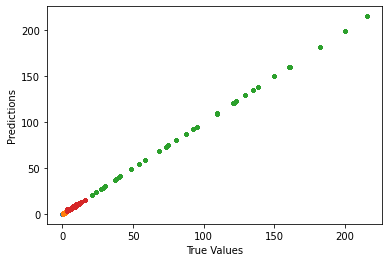

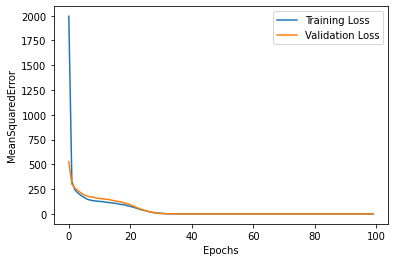

18/18 [==============================] - 0s 2ms/step


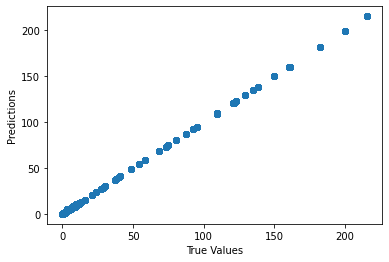

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 100)               500       
                                                                 
 dense_66 (Dense)            (None, 200)               20200     
                                                                 
 dense_67 (Dense)            (None, 100)               20100     
                                                                 
 dense_68 (Dense)            (None, 4)                 404       
                                                                 
Total params: 41,204
Trainable params: 41,204
Non-trainable params: 0
_________________________________________________________________


In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
sc = StandardScaler()

data = pd.read_csv('ANN emissions.csv')
X = data[['Ethanol%','Methanol%','Gasoline%','RPM']].values
Y = data[['CO', 'CO2', 'HC', 'NO']].values
X=sc.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4))

ann.compile(optimizer="adam",loss="MeanSquaredError")
history=ann.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))
predictions = ann.predict(X)

#r squared value
print(r2_score(Y, predictions))

#Save predicted data
print(ann.predict(sc.transform([[0,0,100,1000]])))
save = pd.DataFrame(predictions)
save.to_csv("prediction.csv")

#Regression Plot
plt.plot(Y, predictions, '.')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#Performance Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MeanSquaredError')
plt.legend()
plt.show()

#  regression plot for testing data
Y_pred = ann.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

ann.summary()